In [19]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.metrics import euclidean_distances
from sklearn import manifold

# Dimension reduction with PCA
In this exercise, we use the [census crime data](https://moodle.city.ac.uk/pluginfile.php/2782683/mod_page/content/5/censusCrimeClean.csv) that we've used before..

We will be doing some PCA on these data. PCA is about dimension-reduction so we will creating synthetic variables that try to capture most variation and studying the contributions of each variable to this. To remind you, each row (sample/record) is a "community" (small geographical region) with census data (and crime) recorded.

Using real and messy data often makes the interpretation more difficult. In this exercise, you will see first-hand an example of what happens if we include some invalid features.

1. Load the data (above) in a DataFrame.
2. Since PCA only works with numerical data, extract all the data except the first column (which is text) and store as a variable.
3. Create and fit PCA with two components with these features
4. Look at the `explained_variance_ratio_`. How much of the variation are these two components capturing? Try standardising the variables and see what effect that has. Standardising scales the variables so they all have the same variance. This is [usually recommended for PCA](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py), because it ensure all variables considered with the same weighing. But in our case, the variables are all percentages, so it may be less important. Comment on how much of the variation is captured into these two variables.
5. [Transform](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.fit_transform) the samples into the principal components and plot them on a scatterplot. Each dot (sample) is a "community" (small geographical region). How does this look?
6. Look at the loadings. The `components_` attributes contains the loadings that give the contribution of each feature on the principal component (listed in the same order as the column order). I suggest you:
    - put them in a panda dataframe with the original column headings as the headings
    - transpose so that the rows are the features and the columns are the components
    - convert the values to absolute values (remove the sign, we don't need it)
    - sort by the (absolute) loadings in the first column
    These will tell you which variables most strongly contribute. You will see that one massively dominates and this may help you interpret the scatterplot. Have a look at the variable. Why should be not be using it?
7. Repeat with this variable removed.
8. As an extra - plot the samples in the principal component space (like before). Colour the points by `ViolentCrimesPerPop`. In which principal components does this vary? Look at the loadings - which variables seem to relate to this? Note that this is not a great way to analyse this, just a by-product of what we have done.

In [2]:
census_df = pd.read_csv("censusCrimeClean.csv", header = 0)
census_df.head()

,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [3]:
# Store the data without first column (since it is a text)
features = census_df.iloc[:,1:]

# More simple way
# df.drop(labels='communityname', axis=1)

# Check
features.head()

,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [9]:
# Create PCA object with 2 components
pca = PCA(n_components=2)

# Fit the components
pca.fit(features)

PCA(n_components=2)

In [10]:
# Statistical measure of how much variation in a dataset can be 
# attributed to each of the principal components (eigenvectors) 
# generated by the principal component analysis (PCA) method
pca.explained_variance_

array([8.26130789, 1.08655844])

In [12]:
# Samething, but normalised
pca.explained_variance_ratio_

array([0.67387831, 0.08863102])

The first component captures 67% of the variance. That's not bad for one variable! The second component captures very little. That's a bit suspicous, because it suggests that all the many of the variables are covariant. Let's plot them and look at the loadings.

In [14]:
# Project the features into these principle components
projectedAxes = pca.transform(features)
projectedAxes

array([[-4.48530725,  0.43431296],
       [-4.50077071, -0.15767396],
       [-4.50207835, -0.54852738],
       ...,
       [ 4.49526516, -0.62984225],
       [ 4.5111374 ,  0.45542623],
       [ 4.50790382, -0.50107753]])

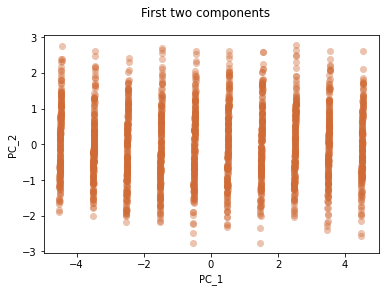

In [16]:
plt.suptitle('First two components')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.scatter(projectedAxes[:,0], projectedAxes[:,1], c = "#D06B36", s = 50, alpha = 0.4, linewidth=0);

Looks distinctly weird! This often happens when a categorical or highly structure variable is included in the mix. Component 1 looks like it's dominated by a discrete variable. Let's look at the loadings to investigate further.

In [18]:
# Get the loadings dataframe
loadings=pd.DataFrame(pca.components_,columns=census_df.columns.values[1:])
loadings=loadings.transpose()
loadings=loadings.abs()
loadings=loadings.sort_values(by=0,ascending=False)
loadings

,0,1
fold,0.999788,0.016430
pctUrban,0.004944,0.146079
PctOccupManu,0.004403,0.132659
RentHighQ,0.004078,0.188187
medIncome,0.003932,0.185649
...,...,...
PctForeignBorn,0.000076,0.024639
racepctblack,0.000066,0.130905
racePctAsian,0.000064,0.061561
PctUsePubTrans,0.000037,0.036078


One variable dominates: `fold`

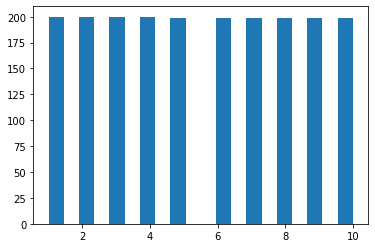

In [19]:
plt.hist(census_df['fold'],bins=20);

This is clearly a rogue variable that isn't really a census variable. So let's drop it.

[1.0884979  0.75511529]
[0.27204086 0.18872082]


,0,1
PctHousNoPhone,0.197953,0.011821
PctPopUnderPov,0.190608,0.031635
RentHighQ,0.188423,0.136248
medIncome,0.185822,0.040774
PctYoungKids2Par,0.178807,0.017237
...,...,...
pctWRetire,0.005575,0.068609
PctRecImmig8,0.002027,0.255064
PctRecentImmig,0.001797,0.248239
PctRecImmig5,0.000901,0.252463


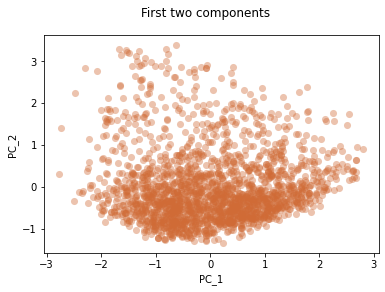

In [20]:
features = census_df.iloc[:,2:]
#You may wish to standardise
#features=preprocessing.scale(features)

# Create and fit a PCA model
pca = PCA(n_components=2)

pca.fit(features)

# Look at the component loadings. 
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

# project the features into these principle components
projectedAxes = pca.transform(features)

plt.figure(1)
plt.suptitle('First two components')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.scatter(projectedAxes[:,0], projectedAxes[:,1], c = "#D06B36", s = 50, alpha = 0.4, linewidth=0)

loadings=pd.DataFrame(pca.components_,columns=census_df.columns.values[2:])
loadings=loadings.transpose()
loadings=loadings.abs()
loadings=loadings.sort_values(by =0,ascending=False)
loadings

This PCA looks more like as we would expect. The previous one was totally dominated by a discrete variable that was just an artefact of our data. We explain much less of the variation now, but the variation is better spread between the two principal components.

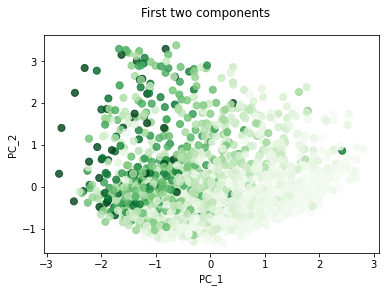

In [22]:
# Colour the points by ViolentCrimesPerPop
plt.suptitle('First two components')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.scatter(projectedAxes[:,0], projectedAxes[:,1], c = census_df['ViolentCrimesPerPop'], cmap = plt.cm.Greens, s = 50, alpha = 0.8);

The first principle component seems to broadly distinguish areas with high crime, so the loadings on the first component are likely to be discriminating of this.

However, as mentioned this is not a great way to analyse crime, we just consider it as a by-product of what we have done.

# Multidimensional scaling
In this example, we will be using data on [London Boroughs made available in London Datastore](https://londondatastore-upload.s3.amazonaws.com/instant-atlas/borough-profiles/atlas.html). We will be using multidimensional scaling to plot them from multidemensional space into an abstract two dimensional space. The distances between borough will reflect their multidimensional similarity based on the numerical features we give them. This exercise will let you try different measures of similarity by choosing different features.

Although we can use PCA for this, MDS is non-linear and does a better job of capturing local differences (try PCA too, if you like).

1. Load the data [from here](https://moodle.city.ac.uk/pluginfile.php/2782702/mod_page/content/18/london-borough-profilesV2.xlsx)

In [30]:
londonBorough = pd.read_excel('london-borough-profilesV2.xlsx')
londonBorough.head()

,Code,Area/INDICATOR,Inner/ Outer London,GLA Population Estimate 2013,GLA Household Estimate 2013,Inland Area (Hectares),Population density (per hectare) 2013,"Average Age, 2013","Proportion of population aged 0-15, 2013","Proportion of population of working-age, 2013",...,Teenage conception rate (2012),Life satisfaction score 2012-13 (out of 10),Worthwhileness score 2012-13 (out of 10),Happiness score 2012-13 (out of 10),Anxiety score 2012-13 (out of 10),Political control in council,Proportion of seats won by Conservatives in 2014 election,Proportion of seats won by Labour in 2014 election,Proportion of seats won by Lib Dems in 2014 election,Turnout at 2014 local elections
0,E09000001,City of London,Inner London,8000,4514.371383,290.4,27.525868,41.303887,7.948036,77.541617,...,.,8.10,8.23,7.44,x,NaN,NaN,NaN,NaN,NaN
1,E09000002,Barking and Dagenham,Outer London,195600,73261.408580,3610.8,54.160527,33.228935,26.072939,63.835021,...,35.4,7.06,7.57,6.97,3.3,Lab,0,100,0,38.16
2,E09000003,Barnet,Outer London,370000,141385.794900,8674.8,42.651374,36.896246,20.886408,65.505593,...,14.7,7.35,7.79,7.27,2.63,Cons,50.793651,42.857143,1.587302,41.1
3,E09000004,Bexley,Outer London,236500,94701.226400,6058.1,39.044243,38.883039,20.282830,63.146450,...,25.8,7.47,7.75,7.21,3.22,Cons,71.428571,23.809524,0,not avail
4,E09000005,Brent,Outer London,320200,114318.553900,4323.3,74.063670,35.262694,20.462585,68.714872,...,19.6,7.23,7.32,7.09,3.33,Lab,9.52381,88.888889,1.587302,33


2. This is a messy dataset with lots of missing value with odd characters. I recommend you extract all the numerical columns to use as the features.

In [12]:
# Get features we want to use
# since the data is problematic and the missing values are 
# represented with all sorts of strange characters, let's
# force everything to be converted into number which
# will turn problematic values NAN
londonBorough_feat = londonBorough.apply(pd.to_numeric, errors='coerce')
londonBorough_feat = londonBorough_feat.dropna(axis=1, how='all')

# Check the dimmensions of datasets before and after removal
print("Before:", londonBorough.shape)
print("After: ", londonBorough_feat.shape)

Before: (38, 76)
After:  (38, 69)


Fill the NANs with the column mean and centralise them (subtract the column mean from each value)

In [13]:
# Fill the missing values with mean()
londonBorough_feat = londonBorough_feat.fillna(londonBorough_feat.mean())

# Centralise
londonBorough_feat -= londonBorough_feat.mean()
londonBorough_feat.head()

,GLA Population Estimate 2013,GLA Household Estimate 2013,Inland Area (Hectares),Population density (per hectare) 2013,"Average Age, 2013","Proportion of population aged 0-15, 2013","Proportion of population of working-age, 2013","Proportion of population aged 65 and over, 2013",% of resident population born abroad (2013),% of largest migrant population (2013),...,"Female life expectancy, (2010-12)",Teenage conception rate (2012),Life satisfaction score 2012-13 (out of 10),Worthwhileness score 2012-13 (out of 10),Happiness score 2012-13 (out of 10),Anxiety score 2012-13 (out of 10),Proportion of seats won by Conservatives in 2014 election,Proportion of seats won by Labour in 2014 election,Proportion of seats won by Lib Dems in 2014 election,Turnout at 2014 local elections
0,-3.742502e+06,-1.567421e+06,-994685.223684,-39.373217,5.270954,-11.495819,8.726859,2.768961,7.105427e-15,0.000000,...,-1.421085e-14,0.000000,0.810526,0.647632,0.229211,0.000000,7.105427e-15,1.421085e-14,-8.881784e-16,0.000000
1,-3.554902e+06,-1.498674e+06,-991364.823684,-12.738558,-2.803999,6.629084,-4.979737,-1.649347,1.114153e+00,0.971445,...,-1.785588e+00,9.569444,-0.229474,-0.012368,-0.240789,0.028919,-3.278219e+01,4.322067e+01,-6.543400e+00,-0.894783
2,-3.380502e+06,-1.430550e+06,-986300.823684,-24.247711,0.863312,1.442553,-3.309165,1.866612,1.179021e+00,-2.608904,...,7.144118e-01,-11.130556,0.060526,0.207632,0.059211,-0.641081,1.801146e+01,-1.392219e+01,-4.956098e+00,2.045217
3,-3.514002e+06,-1.477235e+06,-988917.523684,-27.854842,2.850106,0.838975,-5.668308,4.829333,-1.822510e+01,-2.673620,...,6.144118e-01,-0.030556,0.180526,0.167632,-0.000789,-0.051081,3.864638e+01,-3.296981e+01,-6.543400e+00,0.000000
4,-3.430302e+06,-1.457617e+06,-990652.323684,7.164584,-0.770239,1.018729,-0.099886,-0.918844,1.863207e+01,5.873743,...,7.144118e-01,-6.230556,-0.059474,-0.262368,-0.120789,0.058919,-2.325838e+01,3.210956e+01,-4.956098e+00,-6.054783


We need to compute a distance matrix of pairwise similarites. We will used Euclidean distances, but of course you could use anything appropriate. You put `londonBorough_feat` in twice so its every borough to every borough.

In [18]:
# Compute the euclidean distances between the columns by passing the same data twice
# The resulting data matrix now has the pairwise distances between the boroughs
distMatrix = euclidean_distances(londonBorough_feat, londonBorough_feat)
print("Dimmensions: ", distMatrix.shape)

# Check out the matrix as dataframe
distMatrix_df = pd.DataFrame(distMatrix)
distMatrix_df

Dimmensions:  (38, 38)


,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.000000e+00,6.084487e+05,5.651494e+05,5.882598e+05,5.325398e+05,5.770659e+05,2.678479e+05,6.292800e+05,5.507836e+05,5.966924e+05,...,5.526052e+05,4.425844e+05,5.750952e+05,4.822607e+05,3.743654e+05,4.576021e+06,6.019418e+06,1.059625e+07,6.998287e+07,8.500506e+07
1,6.084487e+05,0.000000e+00,2.836910e+05,8.612912e+04,2.276954e+05,2.145610e+05,4.913805e+05,2.344411e+05,2.421313e+05,1.774722e+05,...,8.201661e+04,2.577926e+05,1.172680e+05,3.222082e+05,8.450026e+05,4.663299e+06,5.933273e+06,1.059397e+07,6.994509e+07,8.496357e+07
2,5.651494e+05,2.836910e+05,0.000000e+00,2.048945e+05,8.785223e+04,8.199413e+04,3.458770e+05,1.081319e+05,4.883614e+04,1.179013e+05,...,2.277089e+05,1.784710e+05,1.730221e+05,1.424379e+05,6.855615e+05,4.443024e+06,5.705363e+06,1.036598e+07,6.971918e+07,8.474255e+07
3,5.882598e+05,8.612912e+04,2.048945e+05,0.000000e+00,1.604746e+05,1.309295e+05,4.438429e+05,1.632370e+05,1.680147e+05,1.030562e+05,...,5.232281e+04,2.137458e+05,6.054383e+04,2.581031e+05,7.993816e+05,4.605271e+06,5.868014e+06,1.053117e+07,6.987889e+07,8.489871e+07
4,5.325398e+05,2.276954e+05,8.785223e+04,1.604746e+05,8.838835e-02,9.101707e+04,3.315640e+05,1.390849e+05,5.097339e+04,1.063299e+05,...,1.694454e+05,1.502527e+05,1.130211e+05,1.150747e+05,6.941624e+05,4.512879e+06,5.783924e+06,1.044246e+07,6.979960e+07,8.482133e+07
5,5.770659e+05,2.145610e+05,8.199413e+04,1.309295e+05,9.101707e+04,0.000000e+00,3.849818e+05,8.423319e+04,6.726092e+04,5.984252e+04,...,1.597112e+05,1.830069e+05,1.143987e+05,1.788075e+05,7.331675e+05,4.502741e+06,5.759366e+06,1.042342e+07,6.976988e+07,8.479133e+07
6,2.678479e+05,4.913805e+05,3.458770e+05,4.438429e+05,3.315640e+05,3.849818e+05,0.000000e+00,4.317931e+05,3.442911e+05,4.142525e+05,...,4.235413e+05,2.740903e+05,4.135104e+05,2.568368e+05,3.838431e+05,4.445576e+06,5.816125e+06,1.042714e+07,6.980626e+07,8.483031e+07
7,6.292800e+05,2.344411e+05,1.081319e+05,1.632370e+05,1.390849e+05,8.423319e+04,4.317931e+05,0.000000e+00,9.894162e+04,6.474226e+04,...,2.053080e+05,2.029870e+05,1.485025e+05,2.361262e+05,7.620859e+05,4.452493e+06,5.706708e+06,1.037017e+07,6.972173e+07,8.474504e+07
8,5.507836e+05,2.421313e+05,4.883614e+04,1.680147e+05,5.097339e+04,6.726092e+04,3.442911e+05,9.894162e+04,0.000000e+00,8.635967e+04,...,1.884621e+05,1.480061e+05,1.309117e+05,1.415363e+05,6.926000e+05,4.472835e+06,5.742948e+06,1.040100e+07,6.975768e+07,8.478053e+07
9,5.966924e+05,1.774722e+05,1.179013e+05,1.030562e+05,1.063299e+05,5.984252e+04,4.142525e+05,6.474226e+04,8.635967e+04,0.000000e+00,...,1.420076e+05,1.796793e+05,8.561381e+04,2.149410e+05,7.602462e+05,4.510138e+06,5.770255e+06,1.043272e+07,6.978421e+07,8.480607e+07


Use [scikit-learn's MDS function](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html#sklearn.manifold.MDS) to perform MDS on the data and project the points to a lower-dimensional space (using MDS's `fit_transform()`). Here's is a [(more complicated) example](http://scikit-learn.org/stable/auto_examples/manifold/plot_mds.html).

In [32]:
# Create an MDS
mds = manifold.MDS(n_components = 2, max_iter=3000, n_init=1, dissimilarity="precomputed")
# dissimilarity="precomputed" becausse we calculated the euclidean distance already

# Project the data
Y = mds.fit_transform(distMatrix)
Y_df = pd.DataFrame(Y)
print(Y.shape)
Y_df.head()

(38, 2)


,0,1
0,-4.320935e+06,-1.816596e+06
1,-4.082309e+06,-2.402277e+06
2,-3.912254e+06,-2.180284e+06
3,-4.037096e+06,-2.345581e+06
4,-4.004689e+06,-2.200569e+06


Visualise the data on a 2D scatterplot and annotate the points using the borough names using the [annotate function in matplotlib](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.annotate).

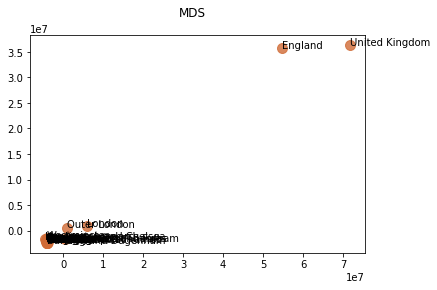

In [34]:
# Project into a scatter plot
f, ax = plt.subplots()
plt.suptitle('MDS')
ax.scatter(Y[:, 0], Y[:, 1], c="#D06B36", s = 100, alpha = 0.8)

# Put in the 
for i, txt in enumerate(londonBorough["Area/INDICATOR"]):
    ax.annotate(txt, (Y[:, 0][i],Y[:, 1][i]))

The aggregate areas are unsurprisingly very different and dominate, so let's remove

You'll see that some of the "boroughs" are not boroughs (they represent aggregated areas) and are VERY different, force the London boroughs to a corner. Remove the 5 aggregated rows and repeat.

In [45]:
# Import dataset again
londonBorough = pd.read_excel('london-borough-profilesV2.xlsx')

# Check the last 10 row
londonBorough.tail(10)

,Code,Area/INDICATOR,Inner/ Outer London,GLA Population Estimate 2013,GLA Household Estimate 2013,Inland Area (Hectares),Population density (per hectare) 2013,"Average Age, 2013","Proportion of population aged 0-15, 2013","Proportion of population of working-age, 2013",...,Teenage conception rate (2012),Life satisfaction score 2012-13 (out of 10),Worthwhileness score 2012-13 (out of 10),Happiness score 2012-13 (out of 10),Anxiety score 2012-13 (out of 10),Political control in council,Proportion of seats won by Conservatives in 2014 election,Proportion of seats won by Labour in 2014 election,Proportion of seats won by Lib Dems in 2014 election,Turnout at 2014 local elections
28,E09000029,Sutton,Outer London,196400,8.074848e+04,4384.70,44.802887,38.310437,20.151661,64.951011,...,25.8,7.25,7.57,7.13,3.34,Lib Dem,16.666667,0,83.333333,42.2
29,E09000030,Tower Hamlets,Inner London,271100,1.092805e+05,1978.10,137.067542,31.064282,19.602621,74.531880,...,24.3,7.28,7.56,7.32,2.93,Tower Hamlets First,15.555556,44.444444,0,not avail
30,E09000031,Waltham Forest,Outer London,267700,1.005245e+05,3880.80,68.970286,34.502988,21.784829,68.105760,...,29.9,7.24,7.72,7.26,2.99,Lab,26.666667,73.333333,0,not avail
31,E09000032,Wandsworth,Inner London,311800,1.315620e+05,3426.40,91.009107,34.414955,17.342442,73.693151,...,25.5,7.23,7.55,7.28,3.55,Cons,68.333333,31.666667,0,not avail
32,E09000033,Westminster,Inner London,226600,1.085501e+05,2148.70,105.457732,36.729055,14.781940,73.924420,...,21.2,7.09,7.44,7.09,3.58,Cons,73.333333,26.666667,0,not avail
33,E13000001,Inner London,.,3339900,1.408739e+06,31929.20,104.604284,34.094128,18.399747,72.928004,...,28.5,7.21,7.52,7.15,3.36,.,23.709902,69.456067,3.76569,not avail
34,E13000002,Outer London,NaN,5100200,1.966369e+06,125423.60,40.663753,36.608313,20.975104,65.989008,...,24.5,7.28,7.58,7.25,3.21,.,39.153439,49.118166,7.848325,not avail
35,E12000007,London,NaN,8440100,3.375108e+06,157214.70,53.685369,35.613397,19.955981,68.734914,...,25.9,7.26,7.56,7.21,3.27,.,33.171259,56.996218,6.266883,not avail
36,E92000001,England,NaN,53493729,2.254290e+07,13027866.98,4.069162,39.442770,18.937222,64.132742,...,27.7,7.44,7.68,7.28,3.05,.,.,.,.,.
37,K02000001,United Kingdom,NaN,63705030,2.706534e+07,24309424.52,2.561228,39.553318,18.811058,64.171517,...,.,7.45,7.69,7.29,3.03,.,.,.,.,.


In [46]:
# Drop last 5 rows
londonBorough = londonBorough.iloc[:-5,:]

# Or we can use these code to drop
# londonBorough = londonBorough[:-5]
# londonBorough= pd.read_excel('london-borough-profilesV2.xlsx').iloc[:-5,:]

In [47]:
londonBorough.tail()

,Code,Area/INDICATOR,Inner/ Outer London,GLA Population Estimate 2013,GLA Household Estimate 2013,Inland Area (Hectares),Population density (per hectare) 2013,"Average Age, 2013","Proportion of population aged 0-15, 2013","Proportion of population of working-age, 2013",...,Teenage conception rate (2012),Life satisfaction score 2012-13 (out of 10),Worthwhileness score 2012-13 (out of 10),Happiness score 2012-13 (out of 10),Anxiety score 2012-13 (out of 10),Political control in council,Proportion of seats won by Conservatives in 2014 election,Proportion of seats won by Labour in 2014 election,Proportion of seats won by Lib Dems in 2014 election,Turnout at 2014 local elections
28,E09000029,Sutton,Outer London,196400,80748.47706,4384.7,44.802887,38.310437,20.151661,64.951011,...,25.8,7.25,7.57,7.13,3.34,Lib Dem,16.666667,0,83.333333,42.2
29,E09000030,Tower Hamlets,Inner London,271100,109280.54010,1978.1,137.067542,31.064282,19.602621,74.531880,...,24.3,7.28,7.56,7.32,2.93,Tower Hamlets First,15.555556,44.444444,0,not avail
30,E09000031,Waltham Forest,Outer London,267700,100524.45890,3880.8,68.970286,34.502988,21.784829,68.105760,...,29.9,7.24,7.72,7.26,2.99,Lab,26.666667,73.333333,0,not avail
31,E09000032,Wandsworth,Inner London,311800,131562.01290,3426.4,91.009107,34.414955,17.342442,73.693151,...,25.5,7.23,7.55,7.28,3.55,Cons,68.333333,31.666667,0,not avail
32,E09000033,Westminster,Inner London,226600,108550.11190,2148.7,105.457732,36.729055,14.781940,73.924420,...,21.2,7.09,7.44,7.09,3.58,Cons,73.333333,26.666667,0,not avail


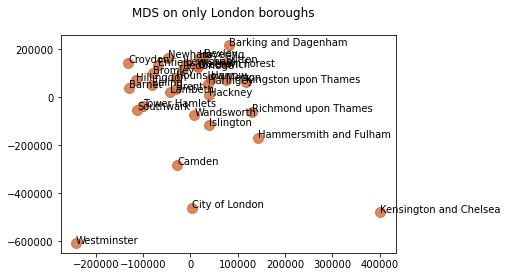

In [48]:
# Same as above

# Get features we want to use
londonBorough_feat = londonBorough.apply(pd.to_numeric, errors='coerce')
londonBorough_feat = londonBorough_feat.dropna(axis=1, how='all')

# Fill the missing values with mean()
londonBorough_feat = londonBorough_feat.fillna(londonBorough_feat.mean())
# Centralise
londonBorough_feat -= londonBorough_feat.mean()

# Create distance matrix
distMatrix = euclidean_distances(londonBorough_feat, londonBorough_feat)

# Create an MDS
mds = manifold.MDS(n_components = 2, max_iter=3000, n_init=1, dissimilarity="precomputed")

# Project the data
Y = mds.fit_transform(distMatrix)

fig, ax = plt.subplots()
plt.suptitle('MDS on only London boroughs')
ax.scatter(Y[:, 0], Y[:, 1], c="#D06B36", s = 100, alpha = 0.8)

for i, txt in enumerate(londonBorough["Area/INDICATOR"]):
    ax.annotate(txt, (Y[:, 0][i],Y[:, 1][i]))

Can see more discrimation. Two seem more different than the rest. But what is this "similarity" based on? It's *important* that we don't just use everything when doing analysis! Think about what you want to find out.

Reflect on the "similarity". We've indiscriminately used all the numerical features without reflecting on what they mean. Pick some and repeat. For example, choose some that might reflect emotional well-being *(happiness, satisfaction, etc. and then try)* this. This will result in different similarities between boroughs.

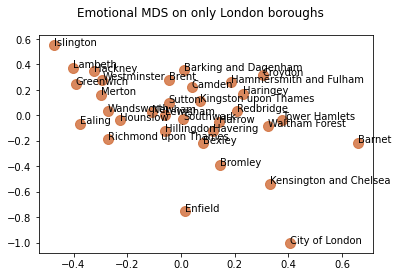

In [51]:
londonBorough_emotionfeat = londonBorough_feat[["Life satisfaction score 2012-13 (out of 10)", "Worthwhileness score 2012-13 (out of 10)","Happiness score 2012-13 (out of 10)","Anxiety score 2012-13 (out of 10)"]]

distMatrix = euclidean_distances(londonBorough_emotionfeat, londonBorough_emotionfeat)

#Create an MDS
mds = manifold.MDS(n_components = 2, max_iter=3000, n_init=1, dissimilarity="precomputed")

#project the data
Y = mds.fit_transform(distMatrix)

fig, ax = plt.subplots()
plt.suptitle('Emotional MDS on only London boroughs')
ax.scatter(Y[:, 0], Y[:, 1], c="#D06B36", s = 100, alpha = 0.8)

for i, txt in enumerate(londonBorough["Area/INDICATOR"]):
    ax.annotate(txt, (Y[:, 0][i],Y[:, 1][i]))

The City of London is very different, probably because almost no one lives there - just banks and offices.

See [The Information Capital](http://www.oliveruberti.com/the-information-capital) (which has a bit of giCentre input) with some lovely examples of interesting perspectives on London. See "Islington has Issues".